In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [173]:
df = pd.read_csv("data/strings.csv")

In [174]:
df.shape
df

,String,Ref. Ten. (lbs),Swing Speed,Material,Gauge Nominal (mm),Gauge Acutal (mm),Stretch at 40 lbs (%),Stretch at 51 lbs (%),Stretch at 62 lbs (%),Actual Pre-impact Tension (lbs),...,Stiffness (lb/in),Static Loss lbs.,Stabilization Loss (lbs),Impact Loss (lbs).,Total Loss (lbs),Tension Loss (%),Energy Return (%),String/String COF,String/Ball COF,Spin Potential
0,Alien Black Diamond 16,51,Medium,Polyester,1.30,1.31,3.0,5.2,5.8,25.42,...,207.5,8.40,16.90,0.33,25.6,50.5,88.5,0.100,0.453,4.5
1,Alpha Gut 2000 16,51,Medium,Nylon,1.33,NaN,7.6,9.1,10.0,42.71,...,161.2,4.32,3.69,-0.02,7.9,15.7,96.4,0.161,0.506,3.1
2,Ashaway Liberty 16,51,Medium,Nylon,1.30,1.33,NaN,NaN,11.2,38.61,...,169.7,7.19,4.92,0.09,12.1,24.0,95.5,0.094,0.434,4.6
3,Ashaway Dynamite Soft 17,51,Medium,Nylon/Zyex,1.25,1.21,8.5,9.1,12.7,36.76,...,127.4,6.99,6.97,0.02,13.9,27.6,94.7,0.204,0.527,2.6
4,Ashaway MonoGut 16L,51,Medium,Polyester,1.27,1.28,1.8,3.0,4.2,27.45,...,228.0,8.16,15.11,0.28,23.6,46.4,89.7,0.106,0.366,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,Yonex Poly Tour 130/16,51,Medium,Polyester,1.30,1.29,NaN,2.3,3.5,26.20,...,232.6,8.71,15.81,0.18,24.7,48.7,88.2,NaN,NaN,NaN
500,Yonex Poly Tour Spin G 1.25,51,Medium,Polyester,1.25,NaN,1.5,2.1,2.7,38.43,...,252.0,4.30,7.99,0.13,12.3,24.5,92.7,0.104,0.497,4.8
501,Yonex Poly Tour Pro Yellow 16L (1.25),51,Medium,Polyester,1.25,1.25,1.8,3.0,3.9,27.65,...,198.9,7.08,15.99,0.20,23.4,45.9,90.8,NaN,NaN,NaN
502,Yonex Tournament 80 Spin 15L-16,51,Medium,NaN,1.33,1.41,8.8,10.0,11.2,40.04,...,166.9,6.68,4.00,0.04,10.8,21.1,92.9,NaN,0.451,NaN


In [175]:
df.columns

Index(['String', 'Ref. Ten. (lbs)', 'Swing Speed', 'Material',
       'Gauge Nominal (mm)', 'Gauge Acutal (mm)', 'Stretch at 40 lbs (%)',
       'Stretch at 51 lbs (%)', 'Stretch at 62 lbs (%)',
       'Actual Pre-impact Tension (lbs)', 'Dwell Time (ms)', 'Deflection (mm)',
       'Tension Change (lbs)', 'Peak Tension (lbs)', 'Peak Perp. Force (lbs)',
       'Ave Perp. Force (lbs)', 'Stiffness (lb/in)', 'Static Loss lbs.',
       'Stabilization Loss (lbs)', 'Impact Loss (lbs).', 'Total Loss (lbs)',
       'Tension Loss (%)', 'Energy Return (%)', 'String/String COF',
       'String/Ball COF', 'Spin Potential'],
      dtype='object')

## Get rid of unneccessary columns

In [176]:
df = df[['String', 'Material', 'Gauge Acutal (mm)', 'Stretch at 51 lbs (%)', 
        'Dwell Time (ms)', 'Deflection (mm)', 'Stiffness (lb/in)', 'Spin Potential']]

## Rename the columns

In [177]:
df = df.rename(columns={"Stiffness (lb/in)": "Stiffness", "Spin Potential": "Spin", "Dwell Time (ms)" : "Control",
                        'Stretch at 51 lbs (%)' : "Maneuverability", "Gauge Acutal (mm)": "Resistance", "Deflection (mm)" : "Power"})
df.columns

Index(['String', 'Material', 'Resistance', 'Maneuverability', 'Control',
       'Power', 'Stiffness', 'Spin'],
      dtype='object')

## Checking Duplicate Strings

In [178]:
df.duplicated(['String']).sum()
df.shape


(504, 8)

In [179]:
df.isna().sum() / df.shape[0] 

String             0.000000
Material           0.003968
Resistance         0.234127
Maneuverability    0.073413
Control            0.000000
Power              0.000000
Stiffness          0.000000
Spin               0.089286
dtype: float64

## Drop Null Values

In [180]:
df = df[['String', 'Material', 'Maneuverability', 'Control',
       'Power', 'Stiffness', 'Spin']]
df = df.dropna()
df

,String,Material,Maneuverability,Control,Power,Stiffness,Spin
0,Alien Black Diamond 16,Polyester,5.2,38.6,27.9,207.5,4.5
1,Alpha Gut 2000 16,Nylon,9.1,36.9,27.1,161.2,3.1
3,Ashaway Dynamite Soft 17,Nylon/Zyex,9.1,38.9,28.0,127.4,2.6
4,Ashaway MonoGut 16L,Polyester,3.0,37.6,27.0,228.0,3.5
5,Ashaway MonoGut ZX 16,Nylon/Zyex,13.0,41.4,29.8,114.3,4.4
...,...,...,...,...,...,...,...
495,Wilson Natural Gut 16,Gut,6.4,37.7,26.2,97.7,1.3
496,Wilson Ripspin 16,Polyester,3.0,36.9,27.1,236.6,5.2
497,Y-Tex Quadro Twist 16L,Polyester,4.5,38.5,28.2,205.2,6.2
498,Yonex Poly Tour Pro Yellow 16 (1.30),Polyester,2.7,37.7,27.2,210.3,3.4


## Plot the Data

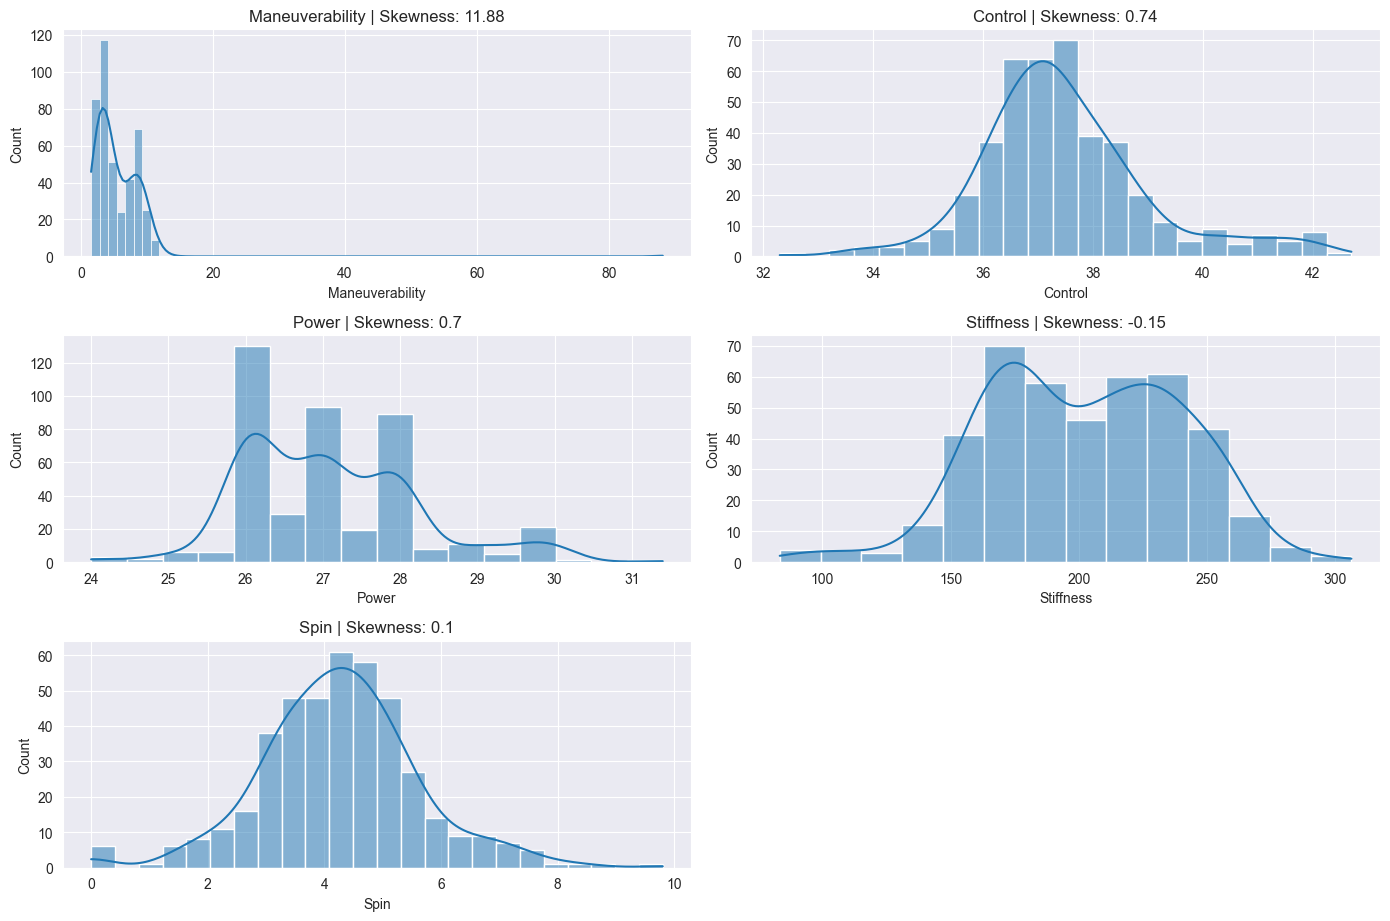

In [181]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes("number").columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 2, idx)
	
	# Kernel density plot
	sns.histplot(df[feature], kde=True)
	plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

## Map the Strings to their Specific Brand/Type

In [182]:
df_copy = df.copy()




material_list = ["Polyester", "Nylon", "Gut"]


df[df['Material'].str.contains('|'.join(material_list), case=False, na=False)]

# Regular expression pattern to extract brand names
pattern = '|'.join(material_list)

# Extract brand names using str.extract() method
df['Material'] = df['Material'].str.extract(f'({pattern})', expand=False)

# Drop rows with NaN values after extraction
df = df.dropna()

In [183]:
df["Material"].value_counts()

Material
Polyester    268
Nylon        146
Gut            8
Name: count, dtype: int64

## Extracting Data

In [184]:
# Extract Data
features = ['Maneuverability', 'Control','Power', 'Stiffness', 'Spin']
X = df[features]
y = df["Material"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## Scaling Data

In [185]:
# We determine how to scale our data based only on training data
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)

# Transform the X values and save them back into dataframes
X_train = pd.DataFrame(scaler.transform(X_train), columns=features)
X_test = pd.DataFrame(scaler.transform(X_test), columns=features)

## Hyperparameter Tuning


In [186]:
# Define a range of k values to test
k_values = list(range(1, 20, 2)) #Odd values from 1 to 20

# Initialize an empty list four our scores
cv_scores = []

# Preform 5-fold cross validation for each k value
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print(k, scores)
    cv_scores.append(scores.mean())

1 [1.         0.98529412 0.98507463 1.         1.        ]
3 [1.         0.98529412 0.98507463 0.98507463 1.        ]
5 [1.         0.98529412 0.97014925 0.98507463 1.        ]
7 [1.         0.95588235 0.95522388 0.98507463 1.        ]
9 [1.         0.95588235 0.95522388 0.97014925 0.98507463]
11 [0.98529412 0.95588235 0.95522388 0.97014925 0.97014925]
13 [0.98529412 0.95588235 0.95522388 0.97014925 0.98507463]
15 [0.98529412 0.95588235 0.95522388 0.97014925 0.97014925]
17 [0.98529412 0.95588235 0.95522388 0.97014925 0.97014925]
19 [0.97058824 0.95588235 0.95522388 0.97014925 0.97014925]


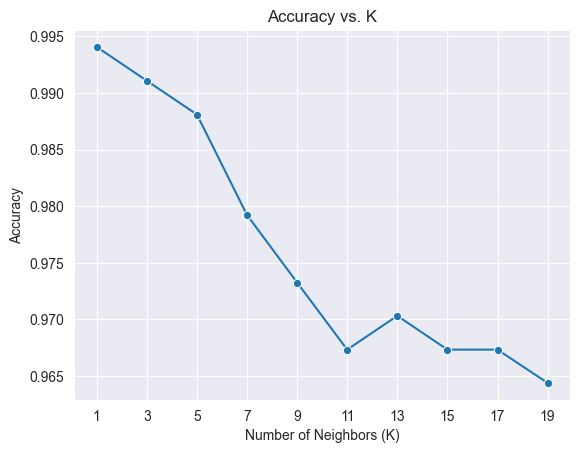

In [187]:
# Plot our Cross Validation Results
sns.lineplot(x=k_values, y=cv_scores, marker='o')
plt.title('Accuracy vs. K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)

<Axes: >

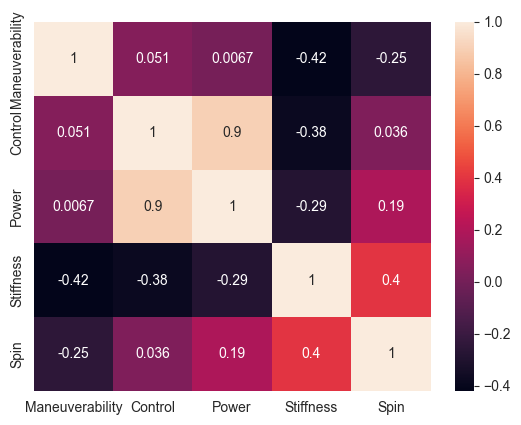

In [188]:
numeric = df.select_dtypes("number")
cor = numeric.corr()
sns.heatmap(cor, annot=True)

# Feature Selection

In [189]:
features = ['Maneuverability', 'Control', 'Power', 'Stiffness', 'Spin']
y = df["Material"]
model = KNeighborsClassifier(n_neighbors=3)
best_score = 0
best_feature = None
selected_features = []
length = len(features)
for i in range(length):
    best_score = 0
    best_feature = None
    for feature in features:
        X = df[[feature] + selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
        model = model.fit(X_train, y_train)
        # Evaluate the model
        score = model.score(X_test, y_test) 
        # print("Feature:", feature, "Best Score:", best_score, "Score:", score)
        if score > best_score:
            best_score = score
            best_feature = feature
    selected_features.append(best_feature)
    features.remove(best_feature)
    print("Added: ", best_feature)
    print("Selected Features:", selected_features, "Score:", best_score)

Added:  Stiffness
Selected Features: ['Stiffness'] Score: 0.9529411764705882
Added:  Maneuverability
Selected Features: ['Stiffness', 'Maneuverability'] Score: 0.9764705882352941
Added:  Control
Selected Features: ['Stiffness', 'Maneuverability', 'Control'] Score: 0.9882352941176471
Added:  Power
Selected Features: ['Stiffness', 'Maneuverability', 'Control', 'Power'] Score: 0.9882352941176471
Added:  Spin
Selected Features: ['Stiffness', 'Maneuverability', 'Control', 'Power', 'Spin'] Score: 1.0


## Model

In [190]:
#Create the model
model = KNeighborsClassifier(n_neighbors=13)

# Train the model
model = model.fit(X_train, y_train)

## Get User Input

In [191]:
control = int(input("On a scale of 32-44 how much control do you want in your racket: "))
stiffness = int(input("On a scale of 120-320 how much stiffness do you want in your racket: "))
spin = int(input("On a scale of 0-10 how much spin do you want in your racket: "))
power = int(input("On a scale of 24-31 how much power do you want in your racket: "))
maneuverability = int(input("On a scale of 0-15 how much maneuverability do you want in your racket: "))


### Using the Model to Classify the Users Data

In [192]:
lst = [[control, stiffness, spin, maneuverability, power]]
dic = {"Control": control, "Stiffness": stiffness, "Power": power, "Maneuverability": maneuverability, "Spin": spin}
prediction = model.predict(lst)

/Users/stefanperkovic/Desktop/Racquet-Recommender/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Brand Recommendation

In [193]:
print("The String material that is reccommended for you is " + prediction[0])

The String material that is reccommended for you is Polyester


## Your Preferences compared to specific models the racquet

In [195]:
print(dic)
df_copy = df.loc[df["Material"] == "Nylon"]
df_copy["String"].head()

{'Control': 38, 'Stiffness': 200, 'Power': 27, 'Maneuverability': 12, 'Spin': 7}


1            Alpha Gut 2000 16
3     Ashaway Dynamite Soft 17
5        Ashaway MonoGut ZX 16
6          Ashaway Dynamite 17
11        Babolat FiberTour 16
Name: String, dtype: object